# Modelling Dome Flat Illumination

Wayne Green

Currently, this is a work in progress.

## Summary

The intensity from the bulb ($I_0$) hits the corner of the screen at a distance $D_0$. The distance from that point is some offset $(x,y)$ from that point. The ratio: 

$\frac{I_0}{D_0^2} = \frac{I_p}{D_(x,y)^2}$

$\frac{I_p}{I_0} = \frac{D_0^2}{D_(x,y)^2}$

## Discussion
This approach computes a screen for one bulb, then rotates that image and co-adds it together for the final result. It writes the result into the Google Drive at the top level as a fits file.

This article (Google Colab) is a simple model of a flat dome screen's illumination pattern from 4 perfect bulbs located along the circumference of the optical tube -- 90 degrees apart. The asumptions for this article include a flat dome surface $S$, located at a distance  $P_d$ 3 times the aperture diameter ($A_d$) away from a tube of diameter $T_d$ with a tube length of $T_l$. The assumption is the light is from a "perfect" light bulb, located on the edge of the tube and facing towards the screen. The illumination pattern model details are discussed here.

Any additional contributions to the screen by reflections from scattered light are ignored. The Mirror diameter is $M_d$. Any structure like the shadow of the filament is ignored. Internal reflections within the tube are ignored. Additional scattering due to dust or defects with the optics are also ignored.

Here a reflecting telecope serves as the "mind-model" for the system. 

For each of the lamp's rays, the distance from the bulb is calculated into a (X,Y) grid of points located at a Eculidian distance ($\sqrt{X^2+Y^2}$) from a zero point $P_{0,n} = ((X_0,Y_0)$) correspoding to the shortest distance from bulb $n$. The grid is slightly larger making each bulb's suboiint inset into the grid by a small offset. The physical placement of the bulbs will create a box that contains the diameter of the tube. In the main 4-light figure below, the bright spot is noticably away from the corners.

The screen is considered to be a "detector", no consideration is payed to light reflected from the surface towards the telescope. External ambient light (critical to consider) is ignored. The source of illumination is considered to be "Lambertian" in nature if the intensity as a function of viewing angle ($I(\theta)$) follows:

$I(\theta) = \frac{dP}{d\Omega}cos\theta$

In the case of a frosted light bulb there are several factors to consider. They include: 1) the random back-scattering of photons within the bulb prior to a fraction that escapes the bulb will have a pattern carrying the "shadow" of the filament; 2) the uneveness of the coating and 3) any markings. To this end, it is best to put the bulb in a protective housing with a small masking aperture for the light that will reach the screen.

Ryer[1] cites the "five times rule" when the diameter of the source is less than 1/20 the projection distance; the area of the source behaves like a point source to within a 1% error margin. The masking aperture will satisfy this condition. An aperture that is located at a small distance from the bulb, will approach a Lambertian source as the viewing angle becomes co-planar with the aperture.

## Conclusion

One has to be careful with illuminance, as the body of information is taylored to the behavior of an eyeball under lighting conditions found in industry. 
Based on some over-simplified conditions, the illumination of the dome flat screen is remarkably flat to within a fraction of 1 percent for a crudely constructed apparatus. 
This study should be extended to include the behavior of reflections from the screen, and the geometry of the reflected light into the optical tube assembly and its relationship to the optical performance of the telescope and any effects due to central obstructions or internal optics/filters.

### References:
------------

[1] Ryer, Alex, Light Measurement Handbook, 1997. Chapter 6. http://www.dfisica.ubi.pt/~hgil/Fotometria/HandBook/Light-Measurement.2.pdf 

# Get Python in Gear

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import os
from google.colab import drive
drive.mount('/content/gdrive')
writefits = False
try:
   from astropy.io import fits
except:
    print("Astropy not loaded. Run under anaconda with iraf27 recipe.")



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# A vectorized distance metric
def baserootd(separation,x,y):
    """Given an x,y on the screen, return hypotenuse
    (x,y) is point in plane of the screen, we want the distance from the
    lamp to that point. Plane Euclidian geometry: let a = dist to subpoint,
    np.sqrt(a**2 + b**2)) distance of second side and the distance from lamp
    to point is (dist*dist + np.sqrt(x**2 + y**2))
    We want the new distance squared later on, so leave out the  sqrt operation.
    """
    return separation*separation + (x**2 + y**2) #  (x,y) in plane of screen 

rootd = np.vectorize(baserootd) # vectorized baserootd

Initial Conditions
---------------------

We presume the mirror is normal to the screen $S$. The screen is located at a distance of $P_d$ from the end of the optical-tube-assembly. The tube has a length $T_l$ and diameter of $T_d$ that is larger than the diametr of the main mirrir $M_d$.  

In [ ]:
# Initial conditions
T_d = 2.54 * 21.5         # diameter of the OTA aperture [cm]
M_d = 2.54 * 18.0         # diameter of the mirror [cm]
T_l = 2.54 * 55.0         # Length of the tube [cm]
P_d = 3.0  * T_d          # lamp to screen projection distance
P_dsquared = P_d * P_d

root2    =  np.sqrt(2.0)
offs     = T_d * root2 - T_d   # define where the larger square's corners are
tantheta = ((T_d - M_d)/2) / T_l
theta    = np.arctan(tantheta)

diagonal = np.array([(x-offs)/100.0 for x in range(0,100+1+int(offs))]) # radii in cm = m/100
d_len = diagonal.shape[0]
print("diagonal shape {0}".format(diagonal.shape))

print("T_d Diameter of the OTA aperture        {:7.3f} [cm]".format(T_d))
print("M_d Diameter of the mirror              {:7.3f} [cm]".format(M_d))
print("T_l Length of the tube                  {:7.3f} [cm]".format(T_l))
print("P_d Lamp to screen projection distance  {:7.3f} [cm]".format(P_d))

print("Angle {:7.3f}, offset {:7.3f}".format( 2.0 * np.degrees(theta), offs))


diagonal shape (123,)
T_d Diameter of the OTA aperture         54.610 [cm]
M_d Diameter of the mirror               45.720 [cm]
T_l Length of the tube                  139.700 [cm]
P_d Lamp to screen projection distance  163.830 [cm]
Angle   3.645, offset  22.620


Diagonal: min= -0.226, max=  0.994
min=  1.000, max=  1.000, mean=  1.000, std=  0.000


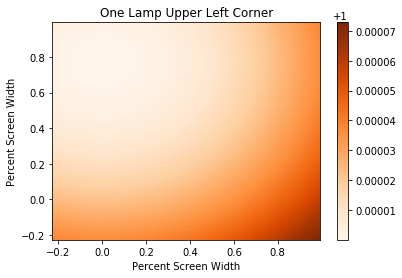

In [ ]:
# Generate data:
# Set up a regular grid of interpolation points
x      = diagonal
y      = diagonal
xg, yg = np.linspace(x.min(), x.max(), d_len), np.linspace(y.min(), y.max(), d_len)
print("Diagonal: min={:7.3f}, max={:7.3f}".format(x.min() ,x.max()))
X,Y    = np.meshgrid(xg,yg)
#Pd2    = P_d**2
ZZ     = rootd(P_d,X,Y) / P_dsquared    # one bulb on the screen upper left
print("min={:7.3f}, max={:7.3f}, mean={:7.3f}, std={:7.3f}".format(ZZ.min() ,ZZ.max() ,ZZ.mean(), ZZ.std()))
# ZZ  ZLR
# ZUD Z4
ZUD    = np.flipud(ZZ)           # mirror for lower left
ZLR    = np.fliplr(ZZ)           # mirror for upper right
Z4     = np.fliplr(ZUD)          # mirror for lower right corner
ZTotal = ((ZZ + ZUD + ZLR + Z4)/4.0 )    # combine 4 bulbs into one screen

# Pearson's formula median is approximaged by (2xmean + mode)/3
# with algebra 3xmedian-2xmean = mode
mode = 3 * ZTotal.mean() + 2.0 * np.median(ZTotal)
# plot the results

S      = ZUD
fig,ax = plt.subplots()

#print X.shape,Y.shape,Z.shape
p = ax.pcolor(X, Y, S, cmap=cm.Oranges)#, vmin=abs(S).min(), vmax=abs(S).max())
ax.set_title("One Lamp Upper Left Corner")
ax.set_xlabel('Percent Screen Width')
ax.set_ylabel('Percent Screen Width')
cb = fig.colorbar(p)
if(1):
   filename = '1Lamp.fits'
   newhdu             = fits.PrimaryHDU(S)
   newhdu.writeto('/content/gdrive/My Drive/'+filename,overwrite=True)
else:
    print ("Astropy missing, FITS write skipped.")


In [ ]:
S    = ZTotal                    # For the screen image; /invert colors
#S = np.log10(S)





min  = 1.00001
max  = 1.00004
mean = 1.00002
std  = 0.00001

Mag delta =    0.0000301


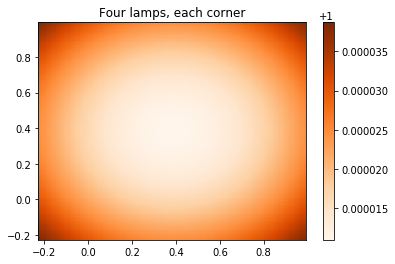

In [ ]:
fig2,ax2 = plt.subplots()

#print (X.shape,Y.shape,Z.shape)
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
#S[S>0.9995] = 0.9995
p = ax2.pcolor(X, Y, S, cmap=cm.Oranges, norm=norm,vmin=abs(S).min(), vmax=abs(S).max())
ax2.set_title("Four lamps, each corner")
cb = fig2.colorbar(p)
print ("min  = {:7.5f}\nmax  = {:7.5f}\nmean = {:7.5f}\nstd  = {:7.5f}\n".
       format(S.min(),S.max(),S.mean(),S.std()))
print ("Mag delta = %12.7f" % (-2.5*np.log10(S.min()/S.max())))


In [ ]:
if(1):
   filename = '4Lamp.fits'
   newhdu             = fits.PrimaryHDU(S)
   newhdu.writeto('/content/gdrive/My Drive/'+filename,overwrite=True)
else:
    print ("Astropy missing, FITS write skipped.")

In [ ]:
print("Flatness: ",S[30:-30,30:-30].min()/S[30:-30,30:-30].max())

Flatness:  0.9999928392478166
